In [224]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

In [2]:
# steps according to https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
    # Define a fitness function object.
    # Define an optimization problem object.
    # Select and run a randomized optimization algorithm.

In [5]:
fitness = mlrose.Queens()
# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

   # Initialize counter
    fitness_cnt = 0

          # For all pairs of queens
    for i in range(len(state) - 1):
         for j in range(i + 1, len(state)):

        # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

               # If no attacks, then increment counter
               fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)


In [6]:
problem = mlrose.DiscreteOpt(length=8, fitness_fn=fitness, maximize=False, max_val=8)

In [7]:
# Define decay schedule
schedule = mlrose.ExpDecay()

# Define initial state
init_state = np.array([0, 1, 2, 3, 4, 5, 6, 7])




In [42]:
# Solve problem using random hill climbing
best_state, best_fitness = mlrose.random_hill_climb(problem,
                                                      max_attempts = 5000, max_iters = 50000,
                                                      init_state = init_state, random_state = 1)

In [48]:
# Solve problem using simulated annealing
best_state, best_fitness = mlrose.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = 150, max_iters = 5000,
                                                      init_state = init_state, random_state = 1)

In [52]:
# Solve problem using GA
best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=10, 
                                              max_iters=np.inf, curve=False, random_state=None)

In [60]:
# Solve problem using MIMIC
best_state, best_fitness = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, 
                                        max_iters=np.inf, curve=False, random_state=None)

In [141]:
# 4 Peaks
# Define initial state
init_state = np.array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
                       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 
                       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 
                       1, 0, 1, 0, 1, 1, 1, 0, 0, 0])
fitness = mlrose.FourPeaks()


In [142]:
problem = mlrose.DiscreteOpt(length=init_state.shape[0], fitness_fn=fitness, maximize=True, max_val=2)

In [161]:
# Solve problem using GA
best_state, best_fitness = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=400, 
                                              max_iters=20000, curve=False, random_state=None)

In [163]:
# Solve problem using MIMIC
best_state, best_fitness = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=1000, 
                                        max_iters=np.inf, curve=False, random_state=None)

In [162]:
print (best_state, best_fitness)

[1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0] 62.0


In [127]:
fitness = mlrose.FourPeaks(t_pct=0.1)
state = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
fitness.evaluate(state)

0

In [ ]:
init_state = np.array()

In [21]:
#for i in range(10, 40, 10):
init_state = np.random.randint(2, size=50)
fitness = mlrose.FourPeaks()
problem = mlrose.DiscreteOpt(length=init_state.shape[0], fitness_fn=fitness, maximize=True, max_val=2)

rhc_fitness_list = []
sa_fitness_list = []
ga_fitness_list= []
mimic_fitness_list = []

iters = np.arange(1, 500, 20)
iters = [2**i for i in range(4, 13)]
for i in iters:
#     # randomized hill climbing
#     rhc_best_state, rhc_best_fitness = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = i,
#                                                           init_state = init_state, random_state = 1)
#     rhc_fitness_list.append(rhc_best_fitness)
    
#     # simulated annealing
#     sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
#                                                                 max_iters = i, init_state = init_state, 
#                                                                 random_state = 1)
#     sa_fitness_list.append(sa_best_fitness)
    
    # ga
    ga_best_state, ga_best_fitness = mlrose.genetic_alg(problem, pop_size=100, mutation_prob=0.2, max_attempts=500, 
                                                        max_iters=i, curve=False, random_state=None)
    ga_fitness_list.append(ga_best_fitness)
    
    # mimic
    mimic_best_state, mimic_best_fitness = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=500, 
                                            max_iters=i, curve=False, random_state=None)
    mimic_fitness_list.append(mimic_best_fitness)
    


KeyboardInterrupt: 

In [4]:
mimic_best_fitness

44.0

In [6]:
iters

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

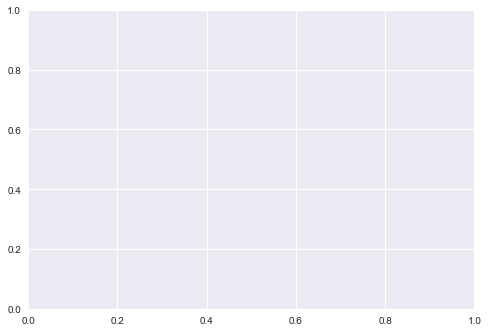

In [23]:
plt.style.use('seaborn')
# plt.plot(iters, rhc_fitness_list, 'o-', color="r", label="rhc")
# plt.plot(iters, sa_fitness_list, 'o-', color="olive", label="sa")
plt.plot(iters, ga_fitness_list, 'o-', color="black", label="ga")
plt.plot(iters, mimic_fitness_list, 'o-', color="g", label="mimic")
plt.xscale('log', basex=2)
plt.ylabel('Fitness', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.title('Fitness vs Iteration for 4 Peaks problem', fontsize=14)
plt.legend()
plt.show()

In [ ]:
plt.close()

In [44]:
#for i in range(10, 40, 10):
init_state = np.random.randint(2, size=20)
fitness = mlrose.FourPeaks()
problem = mlrose.DiscreteOpt(length=init_state.shape[0], fitness_fn=fitness, maximize=True, max_val=2)

rhc_fitness_list = []
sa_fitness_list = []
ga_fitness_list= []
mimic_fitness_list = []

iters = np.arange(1, 500, 20)
iters = [2**i for i in range(4, 13)]
#for i in iters:
#     # randomized hill climbing
#     rhc_best_state, rhc_best_fitness = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = i,
#                                                           init_state = init_state, random_state = 1)
#     rhc_fitness_list.append(rhc_best_fitness)
    
#     # simulated annealing
#     sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
#                                                                 max_iters = i, init_state = init_state, 
#                                                                 random_state = 1)
#     sa_fitness_list.append(sa_best_fitness)
    
# ga
# ga_best_state, ga_best_fitness = mlrose.genetic_alg(problem, pop_size=100, mutation_prob=0.2, max_attempts=500, 
#                                                     max_iters=10, curve=False, random_state=None)
# ga_fitness_list.append(ga_best_fitness)

# mimic
mimic_best_state, mimic_best_fitness = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=400, 
                                        max_iters=1000, curve=False, random_state=None)
mimic_fitness_list.append(mimic_best_fitness)


In [54]:
num_runs = 10
max_iter_p = 10
input_size = 40
init_state = np.random.randint(2, size=input_size)
fitness = mlrose.FourPeaks()
problem = mlrose.DiscreteOpt(length=input_size, fitness_fn=fitness, maximize=True, max_val=2)

In [ ]:
num_runs = 10
max_iter_p = 10
input_size = 40
init_state = np.random.randint(2, size=input_size)
fitness = mlrose.FourPeaks()
problem = mlrose.DiscreteOpt(length=input_size, fitness_fn=fitness, maximize=True, max_val=2)

In [37]:

# randomized hill climbing
iters = [2**i for i in range(max_iter_p)]
rhc_best_fitness_arr = np.empty([0, len(iters)])
rhc_time_arr = np.empty([0, len(iters)])

for n in range(num_runs):
    fitness_list = []
    time_list = []
    for iter in iters:
        start = time.time()
        rhc_best_state, rhc_best_fitness = mlrose.random_hill_climb(problem, max_attempts = 100, max_iters = iter,
                                                              init_state = init_state)
        finish = time.time()
        time_list.append(finish-start)
        fitness_list.append(rhc_best_fitness)
    rhc_time_arr = np.vstack((rhc_time_arr, time_list))
    rhc_best_fitness_arr = np.vstack((rhc_best_fitness_arr, fitness_list))

In [41]:

# simulated annealing
schedule = mlrose.ExpDecay()
iters = [2**i for i in range(max_iter_p)]
sa_best_fitness_arr = np.empty([0, len(iters)])
sa_time_arr = np.empty([0, len(iters)])

for n in range(num_runs):
    fitness_list = []
    time_list = []
    for iter in iters:
        start = time.time()
        sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                                max_iters = iter, init_state = init_state)
        finish = time.time()
        time_list.append(finish-start)
        fitness_list.append(sa_best_fitness)
    sa_time_arr = np.vstack((sa_time_arr, time_list))
    sa_best_fitness_arr = np.vstack((sa_best_fitness_arr, fitness_list))

In [42]:

# Genetic Algorithm
iters = [2**i for i in range(max_iter_p)]
ga_best_fitness_arr = np.empty([0, len(iters)])
ga_time_arr = np.empty([0, len(iters)])

for n in range(num_runs):
    fitness_list = []
    time_list = []
    for iter in iters:
        start = time.time()
        ga_best_state, ga_best_fitness = mlrose.genetic_alg(problem, max_attempts = 100, 
                                                                max_iters = iter)
        finish = time.time()
        time_list.append(finish-start)
        fitness_list.append(ga_best_fitness)
    ga_time_arr = np.vstack((ga_time_arr, time_list))
    ga_best_fitness_arr = np.vstack((ga_best_fitness_arr, fitness_list))

In [5]:
# mimic
iters = [2**i for i in range(max_iter_p)]
mimic_best_fitness_arr = np.empty([0, len(iters)])
mimic_time_arr = np.empty([0, len(iters)])

for n in range(num_runs):
    fitness_list = []
    time_list = []
    for iter in iters:
        start = time.time()
        mimic_best_state, mimic_best_fitness = mlrose.mimic(problem, pop_size=100, keep_pct=0.2, max_attempts=100, 
                                        max_iters=iter)
        finish = time.time()
        time_list.append(finish-start)
        fitness_list.append(mimic_best_fitness)
    mimic_time_arr = np.vstack((mimic_time_arr, time_list))
    mimic_best_fitness_arr = np.vstack((mimic_best_fitness_arr, fitness_list))

In [400]:
sa_best_fitness_arr

array([[  3.,   3.,   3.,   3.,   3.,   3.,   3.,   6.,   8.,  17.],
       [  3.,   3.,   3.,   3.,   3.,   1.,   8.,   1.,   6.,  16.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   5.,   3.,   7.,  14.],
       [  3.,   3.,   3.,   3.,   5.,   5.,   7.,   4.,   6.,  10.],
       [  3.,   3.,   3.,   3.,   2.,   3.,   6.,   8.,   5.,   9.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   5.,   6.,   2.,   5.],
       [  3.,   3.,   3.,   3.,   3.,   4.,   3.,   1.,   9.,  23.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   3.,   9.,   6.,  11.],
       [  3.,   3.,   3.,   5.,   3.,   6.,   3.,   9.,   5.,   6.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   3.,  10.,   3.,   5.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   5.,   3.,  15.,  14.],
       [  3.,   3.,   3.,   3.,   3.,   2.,   3.,   5.,   9.,  20.],
       [  3.,   3.,   3.,   3.,   3.,   1.,   3.,   5.,  12.,  12.],
       [  3.,   3.,   3.,   3.,   3.,   3.,   3.,   5.,   9.,  13.],
       [  3.,   3.,   3.,   3.,   

In [396]:
np.mean(sa_best_fitness_arr, axis = 0)

array([ 3.2,  2.7,  3.6,  6.4,  4.2,  8.7, 17.8, 33.3, 33.2, 37. ])

In [395]:
np.std(sa_best_fitness_arr, axis = 0)

array([ 0.6       ,  0.64031242,  1.28062485,  6.59090282,  2.13541565,
        9.39201789, 11.64302366,  3.76961536,  6.66033032,  0.        ])

In [318]:
np.mean(rhc_best_fitness_arr, axis = 1)

array([4.155, 5.   , 5.7  , 4.9  , 5.3  , 5.   , 6.   , 5.2  , 5.6  ,
       5.9  , 5.4  ])

In [26]:
def plot_fitness_iter(best_fitness_lists, iters, method_names, problem_name, input_size):
    """best fitness list: list of best_fitness_arr for different methods
    """
    opt = 2*input_size - (int(.1*input_size) +1)
    plt.style.use('seaborn')
    for i in range(len(best_fitness_lists)):
        best_fitness_mean = np.mean(best_fitness_lists[i], axis=0)
        best_fitness_std = np.std(best_fitness_lists[i], axis=0)
    
        plt.fill_between(iters, best_fitness_mean - .5*best_fitness_std,
                         best_fitness_mean + .5*best_fitness_std, alpha=0.2,
                         color='C'+str(i))
        plt.plot(iters, best_fitness_mean, 'o-', color='C'+str(i),
                 label=method_names[i])
    plt.axhline(y=opt, color='y', linestyle='--', label='maximum')
    plt.xscale('log', basex=2)
    plt.ylabel('Fitness score', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.title('Fitness score vs. iterations for ' + problem_name + ' with ' + str(input_size)+ ' inputs' )
    plt.legend()
    return plt

<module 'matplotlib.pyplot' from '//anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

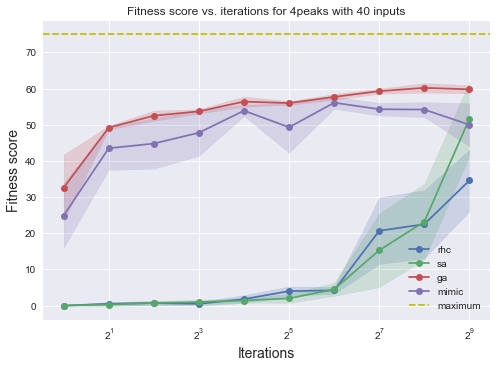

In [43]:
plot_fitness_iter([rhc_best_fitness_arr, sa_best_fitness_arr, ga_best_fitness_arr, mimic_best_fitness_arr], 
                  iters, ['rhc', 'sa', 'ga', 'mimic'], '4peaks', input_size)

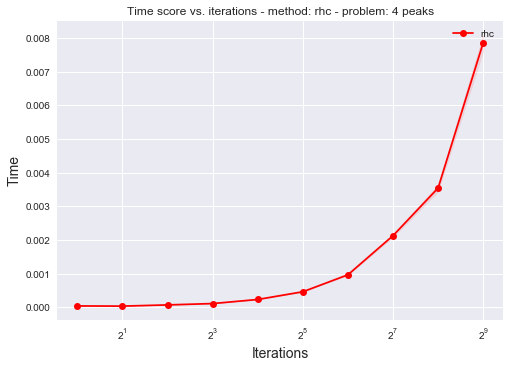

In [40]:
# time vs. iterations
def plot_time_iter(best_fitness_lists, iters, method_names, problem_name):
    """best fitness list: list of best_fitness_arr for different methods
    """
    opt = 2*init_state.shape[0] - (int(.1*init_state.shape[0]) +1)
    plt.style.use('seaborn')
    for i in range(len(best_fitness_lists)):
        best_fitness_mean = np.mean(best_fitness_lists[i], axis=0)
        best_fitness_std = np.std(best_fitness_lists[i], axis=0)
    
        plt.fill_between(iters, best_fitness_mean - best_fitness_std,
                         best_fitness_mean + best_fitness_std, alpha=0.1,
                         color="r")
        plt.plot(iters, best_fitness_mean, 'o-', color='C'+str(i),
                 label=method_names[i])
    plt.axhline(y=opt, color='y', linestyle='--', label='maximum')
    plt.xscale('log', basex=2)
    plt.ylabel('Fitness score', fontsize=14)
    plt.xlabel('Iterations', fontsize=14)
    plt.title('Fitness score vs. iterations - problem: ' + problem_name )
    plt.legend()
    return plt

time_mean = np.mean(rhc_time_arr, axis=0)
time_std = np.std(rhc_time_arr, axis=0)
plt.style.use('seaborn')
plt.fill_between(iters, time_mean - .1*time_std,
                 time_mean + .1*time_std, alpha=0.1,
                 color="r")
plt.plot(iters, time_mean, 'o-', color="r",
         label="rhc")
plt.xscale('log', basex=2)
plt.ylabel('Time', fontsize=14)
plt.xlabel('Iterations', fontsize=14)
plt.title('Time score vs. iterations - method: ' + 'rhc' + ' - problem: ' + '4 peaks' )
plt.legend()

In [220]:
opt_problem = '4peaks'
algorithm = 'simulated annealing'
columns = ['opt_problem', 'algorithm', 'run_number', 'input_size', 'iter', 'time', 'fitness']
fourpeaks_results = pd.DataFrame(columns = columns)
# simulated annealing
schedule = mlrose.ExpDecay()
iters = [2**i for i in range(max_iter_p)]
sa_best_fitness_arr = np.empty([0, len(iters)])
sa_time_arr = np.empty([0, len(iters)])


for n in range(num_runs):
    fitness_list = []
    time_list = []
    for iter in iters:
        start = time.time()
        sa_best_state, sa_best_fitness = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 100, 
                                                                    max_iters = iter, init_state = init_state)
        finish = time.time()
        duration = finish-start
        time_list.append(duration)
        fitness_list.append(sa_best_fitness)
#         result ['run_number']  =  n 
#         result ['input_size'] = input_size
#         result ['iter'] = iter
#         result ['time'] = duration
#         result ['fitness'] = sa_best_fitness
        result = pd.DataFrame([[opt_problem, algorithm, n, input_size, iter, duration, sa_best_fitness]], 
                              columns=columns)
        fourpeaks_results = fourpeaks_results.append(result)
#         fourpeaks_results = pd.concat([fourpeaks_results, pd.Series(result)], ignore_index=True)
    sa_time_arr = np.vstack((sa_time_arr, time_list))
    sa_best_fitness_arr = np.vstack((sa_best_fitness_arr, fitness_list))

In [57]:
import sklearn
import pandas as pd
import numpy as np
from mlrose import FourPeaks, RHCRunner, SARunner, GARunner, MIMICRunner, DiscreteOpt



fitness = FourPeaks()
problem = DiscreteOpt(length=50, fitness_fn=fitness, maximize=True, max_val=2)

rhc = RHCRunner(problem,
                experiment_name='rhc_n',
                seed=123,
                iteration_list=2 ** np.arange(14),
                restart_list=[1],
                max_attempts=500,
                generate_curves=True)

mimic = MIMICRunner(problem=problem,
                 experiment_name='flipflop_n',
                 output_directory='out/',
                 seed=123,
                 iteration_list=2 ** np.arange(14),
                 max_attempts=5000,
                 keep_percent_list=[0.20],
                 population_sizes=[200, 500, 1000])
# the two data frames will contain the results
rhc_run_stats, rhc_run_curves = rhc.run()
mimic_run_stats, mimic_run_curves = mimic.run()



Running rhc
*** Iteration START - params: {'restarts': 1}
restarts:[1], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_n], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[4.0000]
	[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0]

restarts:[1], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_n], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[4.0000]
	[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0]

restarts:[1], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_n], attempt:[3], iteration:[2], done:[False], time:[0.00], fitness:[4.0000]
	[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0]

restarts:[1], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_n], attempt:[5], iteration:[4], done:[False], time:[0.00], fitness:[4.0000]
	[0 1 0 0 0 0 0 1 1 0 1 1 0

KeyboardInterrupt: 

In [ ]:
rhc_run_stats

In [41]:
mimic_run_stats

,Fitness,Iteration,Keep Percent,Population Size,State,Time,keep_pct,pop_size
0,4.0,0,0.2,200,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.002917,0.2,200
1,8.0,1,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",0.831861,0.2,200
2,59.0,2,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",1.672593,0.2,200
3,65.0,4,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3.458800,0.2,200
4,72.0,8,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",7.173264,0.2,200
5,75.0,16,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",13.681340,0.2,200
6,75.0,32,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",27.458752,0.2,200
7,75.0,64,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",53.922334,0.2,200
8,75.0,128,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",105.665630,0.2,200
9,75.0,256,0.2,200,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...",209.855494,0.2,200


In [70]:
import sklearn
import pandas as pd
import numpy as np
from mlrose import FourPeaks, RHCRunner, SARunner, GARunner, MIMICRunner, DiscreteOpt



fitness = FourPeaks()
problem = DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)

rhc = RHCRunner(problem,
                experiment_name='rhc_run_1_len_100',
                seed=123,
                iteration_list=2 ** np.arange(14),
                restart_list=[2],
                max_attempts=500,
                generate_curves=True)
rhc_run_stats, rhc_run_curves = rhc.run()


sa = SARunner(problem,
                experiment_name='sa_n',
                seed=123,
                iteration_list=2 ** np.arange(14),
                temperature_list=[50],
                max_attempts=5000,
                generate_curves=True)
sa_run_stats, sa_run_curves = sa.run()


ga = GARunner(problem,
              experiment_name='ga_n',
              output_directory='out/',
              seed=123,
              iteration_list=2 ** np.arange(14),
              population_sizes=[5000],
              max_attempts=5000,
              mutation_rates=[.2]
              )
ga_run_stats, ga_run_curves = ga.run()

Running rhc
*** Iteration START - params: {'restarts': 2}
restarts:[2], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_run_1_len_100], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[3.0000]
	[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0]

restarts:[2], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_run_1_len_100], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[3.0000]
	[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0]

restarts:[2], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_run_1_len_100], attempt:[3], iteration:[2], done:[False], time:[0.00], fitness:[3.0000]
	[0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 

schedule:[50]
runner_name:[sa], experiment_name:[sa_n], attempt:[4], iteration:[4096], done:[False], time:[0.48], fitness:[64.0000]
	[0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

schedule:[50]
runner_name:[sa], experiment_name:[sa_n], attempt:[2107], iteration:[8192], done:[False], time:[1.45], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

*** Iteration END - params: {'schedule': GeomDecay(init_temp=50, decay=0.99, min_temp=0.001)}

Run time: 1.4597678810023353
Running ga
*** Iteration START - params: {'pop_size': 5000, 'mutation_prob': 0.2}
pop_size:[5000], mutation_prob:[0.2]
runner_name:[ga], experiment_name:[ga_n], attempt:[0], iteration:[0], done:[F

In [71]:
sa_run_stats

,Fitness,Iteration,State,Temperature,Time,schedule
0,3.0,0,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",50,0.000131,50
1,3.0,1,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",50,0.000624,50
2,3.0,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",50,0.001052,50
3,3.0,4,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",50,0.002482,50
4,1.0,8,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",50,0.003123,50
5,1.0,16,"[0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, ...",50,0.003869,50
6,1.0,32,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, ...",50,0.005139,50
7,1.0,64,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, ...",50,0.006764,50
8,0.0,128,"[0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...",50,0.009717,50
9,2.0,256,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, ...",50,0.018764,50


In [72]:
rhc_run_stats

,Fitness,Iteration,Restarts,State,Time,current_restart
0,3.0,0,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.000083,0
1,3.0,1,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.000502,0
2,3.0,2,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.000881,0
3,3.0,4,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.001255,0
4,3.0,8,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.001857,0
5,3.0,16,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.002423,0
6,3.0,32,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.003394,0
7,3.0,64,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.004672,0
8,4.0,128,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.007116,0
9,4.0,256,2,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.013192,0


In [74]:
ga_run_stats

,Fitness,Iteration,Mutation Rate,Population Size,State,Time,mutation_prob,pop_size
0,3.0,0,0.2,5000,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, ...",0.047637,0.2,5000
1,14.0,1,0.2,5000,"[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...",0.608606,0.2,5000
2,16.0,2,0.2,5000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.165368,0.2,5000
3,17.0,4,0.2,5000,"[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, ...",2.236920,0.2,5000
4,117.0,8,0.2,5000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, ...",4.396462,0.2,5000
5,126.0,16,0.2,5000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",8.863872,0.2,5000
6,138.0,32,0.2,5000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",17.822962,0.2,5000
7,158.0,64,0.2,5000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",36.178174,0.2,5000
8,189.0,128,0.2,5000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...",75.664060,0.2,5000
9,189.0,256,0.2,5000,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, ...",160.112479,0.2,5000


In [97]:
fitness = FourPeaks()
problem = DiscreteOpt(length=100, fitness_fn=fitness, maximize=True, max_val=2)
df = pd.DataFrame([])
for i in range(5):
    rhc = RHCRunner(problem,
                    experiment_name='rhc_len_10_run_'+str(i),
                    output_directory='out/',
                    seed = i,
                    iteration_list=2 ** np.arange(14),
                    restart_list=[200],
                    max_attempts=50000,
                    generate_curves=True)
    
    df_str, rhc_run_curves = rhc.run()
    df= pd.concat([df, df_str])


Running rhc
*** Iteration START - params: {'restarts': 200}
restarts:[200], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]

restarts:[200], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2], iteration:[1], done:[False], time:[0.00], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0]

restarts:[200], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3], iteration:[2], done:[False], time:[0.00], fitness:[1.0000]
	[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0

restarts:[200], current_restart:[1]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[39], iteration:[4096], done:[False], time:[1.66], fitness:[77.0000]
	[0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[1]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2968], iteration:[8192], done:[False], time:[2.56], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[2]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[2.57], fitness:[3.0000]
	[0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0
 0 1 0 1 1

restarts:[200], current_restart:[3]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[15], iteration:[4096], done:[False], time:[4.30], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[3]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4111], iteration:[8192], done:[False], time:[5.19], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[4]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[5.20], fitness:[0.0000]
	[0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 

restarts:[200], current_restart:[5]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[140], iteration:[4096], done:[False], time:[6.82], fitness:[87.0000]
	[0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[5]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3795], iteration:[8192], done:[False], time:[7.71], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[6]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[7.72], fitness:[0.0000]
	[0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1
 1 1 0 0 

restarts:[200], current_restart:[7]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[201], iteration:[4096], done:[False], time:[9.41], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[7]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4297], iteration:[8192], done:[False], time:[10.28], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[8]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[10.29], fitness:[1.0000]
	[0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0
 0 0 0

restarts:[200], current_restart:[9]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[76], iteration:[4096], done:[False], time:[12.01], fitness:[78.0000]
	[0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[9]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1804], iteration:[8192], done:[False], time:[12.90], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[10]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[12.91], fitness:[1.0000]
	[0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0
 0 0 1

restarts:[200], current_restart:[11]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[129], iteration:[4096], done:[False], time:[14.53], fitness:[78.0000]
	[0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[11]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3113], iteration:[8192], done:[False], time:[15.37], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[12]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[15.38], fitness:[4.0000]
	[1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1
 1 

restarts:[200], current_restart:[13]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[12], iteration:[4096], done:[False], time:[17.03], fitness:[87.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1]

restarts:[200], current_restart:[13]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3063], iteration:[8192], done:[False], time:[17.88], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[14]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[17.89], fitness:[0.0000]
	[0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0

restarts:[200], current_restart:[15]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[273], iteration:[4096], done:[False], time:[19.52], fitness:[77.0000]
	[0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[15]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3547], iteration:[8192], done:[False], time:[20.39], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[16]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[20.40], fitness:[1.0000]
	[1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0
 0 

restarts:[200], current_restart:[17]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[27], iteration:[64], done:[False], time:[21.62], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1
 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1]

restarts:[200], current_restart:[17]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[91], iteration:[128], done:[False], time:[21.62], fitness:[7.0000]
	[1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1
 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1]

restarts:[200], current_restart:[17]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[41], iteration:[256], done:[False], time:[21.63], fitness:[10.0000]
	[1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0
 0 1 1 0

restarts:[200], current_restart:[19]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[107], iteration:[4096], done:[False], time:[24.44], fitness:[76.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1]

restarts:[200], current_restart:[19]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2759], iteration:[8192], done:[False], time:[25.28], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[20]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[25.29], fitness:[0.0000]
	[0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0
 0 

restarts:[200], current_restart:[21]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[869], iteration:[4096], done:[False], time:[26.93], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[21]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4965], iteration:[8192], done:[False], time:[27.77], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[22]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[27.79], fitness:[1.0000]
	[0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0
 0

restarts:[200], current_restart:[23]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[77], iteration:[4096], done:[False], time:[29.40], fitness:[97.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]

restarts:[200], current_restart:[23]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3798], iteration:[8192], done:[False], time:[30.31], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[24]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[30.32], fitness:[0.0000]
	[0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0
 1 1

restarts:[200], current_restart:[25]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[47], iteration:[4096], done:[False], time:[31.89], fitness:[74.0000]
	[1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[25]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3481], iteration:[8192], done:[False], time:[32.75], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[26]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[32.76], fitness:[2.0000]
	[1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 0 1

restarts:[200], current_restart:[27]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[33], iteration:[4096], done:[False], time:[34.34], fitness:[81.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0]

restarts:[200], current_restart:[27]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3123], iteration:[8192], done:[False], time:[35.22], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[28]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[35.23], fitness:[4.0000]
	[1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1
 1 0

restarts:[200], current_restart:[29]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[250], iteration:[4096], done:[False], time:[36.92], fitness:[64.0000]
	[0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[29]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2342], iteration:[8192], done:[False], time:[37.82], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[30]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[37.83], fitness:[3.0000]
	[1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0
 1 

restarts:[200], current_restart:[31]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[272], iteration:[4096], done:[False], time:[39.49], fitness:[97.0000]
	[1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[31]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4077], iteration:[8192], done:[False], time:[40.37], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[32]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[40.38], fitness:[1.0000]
	[0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1
 1 

restarts:[200], current_restart:[33]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[27], iteration:[4096], done:[False], time:[42.01], fitness:[99.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]

restarts:[200], current_restart:[33]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4070], iteration:[8192], done:[False], time:[42.86], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[34]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[42.87], fitness:[1.0000]
	[1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 0
 1 1

restarts:[200], current_restart:[35]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[778], iteration:[4096], done:[False], time:[44.48], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[35]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4874], iteration:[8192], done:[False], time:[45.32], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[36]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[45.33], fitness:[1.0000]
	[1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0
 1

restarts:[200], current_restart:[37]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[811], iteration:[4096], done:[False], time:[46.93], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[37]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4907], iteration:[8192], done:[False], time:[47.78], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[38]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[47.79], fitness:[1.0000]
	[1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1
 1

restarts:[200], current_restart:[39]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[142], iteration:[4096], done:[False], time:[49.38], fitness:[86.0000]
	[0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[39]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3539], iteration:[8192], done:[False], time:[50.25], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[40]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[50.26], fitness:[0.0000]
	[0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 

restarts:[200], current_restart:[41]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[25], iteration:[4096], done:[False], time:[51.83], fitness:[64.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0
 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0]

restarts:[200], current_restart:[41]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2152], iteration:[8192], done:[False], time:[52.67], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[42]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[52.68], fitness:[1.0000]
	[1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 0

restarts:[200], current_restart:[43]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[93], iteration:[4096], done:[False], time:[54.34], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[43]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4189], iteration:[8192], done:[False], time:[55.18], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[44]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[55.20], fitness:[0.0000]
	[0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0
 0 

restarts:[200], current_restart:[45]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[176], iteration:[4096], done:[False], time:[56.84], fitness:[78.0000]
	[1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[45]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3697], iteration:[8192], done:[False], time:[57.71], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[46]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[57.72], fitness:[1.0000]
	[0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1
 0 

restarts:[200], current_restart:[47]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[79], iteration:[4096], done:[False], time:[59.38], fitness:[84.0000]
	[0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[47]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3690], iteration:[8192], done:[False], time:[60.35], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[48]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[60.36], fitness:[2.0000]
	[0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 0

restarts:[200], current_restart:[49]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[317], iteration:[4096], done:[False], time:[62.07], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[49]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4413], iteration:[8192], done:[False], time:[62.98], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[50]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[62.99], fitness:[2.0000]
	[1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0
 0

restarts:[200], current_restart:[51]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[6], iteration:[4096], done:[False], time:[64.64], fitness:[91.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1]

restarts:[200], current_restart:[51]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3538], iteration:[8192], done:[False], time:[65.50], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[52]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[65.51], fitness:[1.0000]
	[1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 

restarts:[200], current_restart:[53]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[74], iteration:[4096], done:[False], time:[67.13], fitness:[67.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0]

restarts:[200], current_restart:[53]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2645], iteration:[8192], done:[False], time:[68.06], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[54]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[68.07], fitness:[0.0000]
	[0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 1
 1 1

restarts:[200], current_restart:[55]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1038], iteration:[4096], done:[False], time:[69.75], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[55]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[5134], iteration:[8192], done:[False], time:[70.69], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[56]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[70.70], fitness:[0.0000]
	[0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0
 

restarts:[200], current_restart:[57]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[5], iteration:[4096], done:[False], time:[72.36], fitness:[95.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]

restarts:[200], current_restart:[57]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3919], iteration:[8192], done:[False], time:[73.23], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[58]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[73.24], fitness:[9.0000]
	[0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1
 1 1 

restarts:[200], current_restart:[59]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[193], iteration:[4096], done:[False], time:[74.99], fitness:[76.0000]
	[1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[59]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2303], iteration:[8192], done:[False], time:[75.89], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[60]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[75.91], fitness:[0.0000]
	[0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 0 

restarts:[200], current_restart:[61]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[185], iteration:[4096], done:[False], time:[77.59], fitness:[72.0000]
	[0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[61]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3378], iteration:[8192], done:[False], time:[78.48], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[62]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[78.50], fitness:[1.0000]
	[1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1
 1 

restarts:[200], current_restart:[63]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[168], iteration:[4096], done:[False], time:[80.15], fitness:[63.0000]
	[1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[63]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1323], iteration:[8192], done:[False], time:[81.05], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[64]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[81.06], fitness:[1.0000]
	[1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1
 0 

restarts:[200], current_restart:[65]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2], iteration:[4096], done:[False], time:[82.68], fitness:[67.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1]

restarts:[200], current_restart:[65]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2907], iteration:[8192], done:[False], time:[83.55], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[66]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[83.56], fitness:[5.0000]
	[0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1
 0 1 

restarts:[200], current_restart:[67]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[25], iteration:[4096], done:[False], time:[85.29], fitness:[90.0000]
	[1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[67]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3270], iteration:[8192], done:[False], time:[86.17], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[68]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[86.18], fitness:[1.0000]
	[1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0
 1 0

restarts:[200], current_restart:[69]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[28], iteration:[4096], done:[False], time:[87.81], fitness:[93.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1]

restarts:[200], current_restart:[69]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3967], iteration:[8192], done:[False], time:[88.71], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[70]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[88.72], fitness:[0.0000]
	[0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1
 1 0

restarts:[200], current_restart:[71]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[275], iteration:[4096], done:[False], time:[90.41], fitness:[90.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1]

restarts:[200], current_restart:[71]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2791], iteration:[8192], done:[False], time:[91.27], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[72]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[91.28], fitness:[3.0000]
	[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0
 0 

restarts:[200], current_restart:[73]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[86], iteration:[4096], done:[False], time:[92.95], fitness:[86.0000]
	[0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[73]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3370], iteration:[8192], done:[False], time:[93.82], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[74]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[93.83], fitness:[2.0000]
	[1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0
 0 1

restarts:[200], current_restart:[75]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[212], iteration:[4096], done:[False], time:[95.51], fitness:[85.0000]
	[0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[75]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3601], iteration:[8192], done:[False], time:[96.39], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[76]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[96.40], fitness:[0.0000]
	[0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1
 1 

restarts:[200], current_restart:[77]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[991], iteration:[4096], done:[False], time:[98.01], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[77]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[5087], iteration:[8192], done:[False], time:[98.89], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[78]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[98.90], fitness:[2.0000]
	[1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1
 1

restarts:[200], current_restart:[79]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[161], iteration:[4096], done:[False], time:[100.52], fitness:[58.0000]
	[0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[79]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[686], iteration:[8192], done:[False], time:[101.41], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[80]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[101.42], fitness:[2.0000]
	[0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0
 

restarts:[200], current_restart:[81]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[8], iteration:[4096], done:[False], time:[103.08], fitness:[88.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0]

restarts:[200], current_restart:[81]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3411], iteration:[8192], done:[False], time:[103.95], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[82]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[103.96], fitness:[0.0000]
	[0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 0

restarts:[200], current_restart:[83]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[62], iteration:[4096], done:[False], time:[105.60], fitness:[73.0000]
	[1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[83]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2433], iteration:[8192], done:[False], time:[106.49], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[84]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[106.50], fitness:[3.0000]
	[1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1
 

restarts:[200], current_restart:[85]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[247], iteration:[4096], done:[False], time:[108.11], fitness:[57.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1]

restarts:[200], current_restart:[85]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1727], iteration:[8192], done:[False], time:[108.98], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[86]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[108.99], fitness:[8.0000]
	[1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0


restarts:[200], current_restart:[87]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[15], iteration:[4096], done:[False], time:[110.65], fitness:[61.0000]
	[0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[87]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1964], iteration:[8192], done:[False], time:[111.54], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[88]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[111.56], fitness:[0.0000]
	[0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0
 

restarts:[200], current_restart:[89]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3409], iteration:[8192], done:[False], time:[114.09], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[90]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[114.10], fitness:[1.0000]
	[0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0]

restarts:[200], current_restart:[90]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2], iteration:[1], done:[False], time:[114.10], fitness:[1.0000]
	[0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1

restarts:[200], current_restart:[91]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[43], iteration:[4096], done:[False], time:[115.76], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[91]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4139], iteration:[8192], done:[False], time:[116.62], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[92]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[116.63], fitness:[4.0000]
	[1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1


restarts:[200], current_restart:[93]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[43], iteration:[4096], done:[False], time:[118.30], fitness:[99.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]

restarts:[200], current_restart:[93]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4024], iteration:[8192], done:[False], time:[119.16], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[94]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[119.17], fitness:[3.0000]
	[1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0
 

restarts:[200], current_restart:[95]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[476], iteration:[4096], done:[False], time:[120.84], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[95]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4572], iteration:[8192], done:[False], time:[121.73], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[96]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[121.74], fitness:[5.0000]
	[1 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0

restarts:[200], current_restart:[97]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[15], iteration:[4096], done:[False], time:[123.36], fitness:[66.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1]

restarts:[200], current_restart:[97]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2392], iteration:[8192], done:[False], time:[124.24], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[98]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[124.25], fitness:[0.0000]
	[0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 

restarts:[200], current_restart:[99]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[36], iteration:[4096], done:[False], time:[125.89], fitness:[78.0000]
	[0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[99]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2565], iteration:[8192], done:[False], time:[126.78], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[100]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[126.80], fitness:[4.0000]
	[1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1


restarts:[200], current_restart:[101]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[18], iteration:[4096], done:[False], time:[128.48], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[101]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4114], iteration:[8192], done:[False], time:[129.37], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[102]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[129.39], fitness:[1.0000]
	[1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1

restarts:[200], current_restart:[103]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[224], iteration:[4096], done:[False], time:[131.04], fitness:[91.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0]

restarts:[200], current_restart:[103]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3362], iteration:[8192], done:[False], time:[131.92], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[104]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[131.93], fitness:[4.0000]
	[1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1

restarts:[200], current_restart:[105]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[406], iteration:[4096], done:[False], time:[133.56], fitness:[88.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0]

restarts:[200], current_restart:[105]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3300], iteration:[8192], done:[False], time:[134.44], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[106]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[134.45], fitness:[1.0000]
	[1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1

restarts:[200], current_restart:[107]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[92], iteration:[4096], done:[False], time:[136.10], fitness:[58.0000]
	[0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1
 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[107]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2418], iteration:[8192], done:[False], time:[137.00], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[108]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[137.01], fitness:[1.0000]
	[1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 

restarts:[200], current_restart:[109]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[37], iteration:[4096], done:[False], time:[138.66], fitness:[94.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1]

restarts:[200], current_restart:[109]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2967], iteration:[8192], done:[False], time:[139.56], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[110]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[139.57], fitness:[1.0000]
	[1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 

restarts:[200], current_restart:[111]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[81], iteration:[4096], done:[False], time:[141.30], fitness:[89.0000]
	[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[111]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3865], iteration:[8192], done:[False], time:[142.25], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[112]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[142.26], fitness:[1.0000]
	[1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 

restarts:[200], current_restart:[113]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[25], iteration:[4096], done:[False], time:[143.89], fitness:[74.0000]
	[1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[113]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2546], iteration:[8192], done:[False], time:[144.78], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[114]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[144.79], fitness:[2.0000]
	[1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 

restarts:[200], current_restart:[115]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[38], iteration:[4096], done:[False], time:[146.44], fitness:[91.0000]
	[1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[115]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3407], iteration:[8192], done:[False], time:[147.33], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[116]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[147.34], fitness:[1.0000]
	[1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 

restarts:[200], current_restart:[117]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[300], iteration:[4096], done:[False], time:[148.98], fitness:[79.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[117]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3423], iteration:[8192], done:[False], time:[149.88], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[118]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[149.89], fitness:[1.0000]
	[1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0

restarts:[200], current_restart:[119]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[49], iteration:[4096], done:[False], time:[151.51], fitness:[82.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0]

restarts:[200], current_restart:[119]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3256], iteration:[8192], done:[False], time:[152.38], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[120]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[152.40], fitness:[2.0000]
	[0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 

restarts:[200], current_restart:[121]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[338], iteration:[4096], done:[False], time:[154.08], fitness:[60.0000]
	[1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[121]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2577], iteration:[8192], done:[False], time:[154.98], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[122]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[154.99], fitness:[3.0000]
	[0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1

restarts:[200], current_restart:[123]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[66], iteration:[4096], done:[False], time:[156.69], fitness:[78.0000]
	[0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[123]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3210], iteration:[8192], done:[False], time:[157.62], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[124]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[157.63], fitness:[1.0000]
	[0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 

restarts:[200], current_restart:[125]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[530], iteration:[4096], done:[False], time:[159.33], fitness:[55.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1]

restarts:[200], current_restart:[125]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[979], iteration:[8192], done:[False], time:[160.23], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[126]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[160.24], fitness:[1.0000]
	[1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 

restarts:[200], current_restart:[127]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1296], iteration:[4096], done:[False], time:[161.92], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[127]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[5392], iteration:[8192], done:[False], time:[162.80], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[128]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[162.81], fitness:[3.0000]
	[1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0

restarts:[200], current_restart:[129]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[129], iteration:[4096], done:[False], time:[164.45], fitness:[78.0000]
	[1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[129]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3007], iteration:[8192], done:[False], time:[165.35], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[130]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[165.37], fitness:[3.0000]
	[0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1

restarts:[200], current_restart:[131]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[197], iteration:[4096], done:[False], time:[167.13], fitness:[61.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0]

restarts:[200], current_restart:[131]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2114], iteration:[8192], done:[False], time:[168.08], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[132]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[168.09], fitness:[3.0000]
	[1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1

restarts:[200], current_restart:[133]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[18], iteration:[4096], done:[False], time:[169.80], fitness:[88.0000]
	[0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[133]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3663], iteration:[8192], done:[False], time:[170.80], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[134]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[170.81], fitness:[3.0000]
	[1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 

restarts:[200], current_restart:[135]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[57], iteration:[4096], done:[False], time:[172.56], fitness:[72.0000]
	[1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[135]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2773], iteration:[8192], done:[False], time:[173.57], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[136]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[173.59], fitness:[3.0000]
	[1 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 

restarts:[200], current_restart:[137]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[19], iteration:[4096], done:[False], time:[175.35], fitness:[90.0000]
	[0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[137]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3164], iteration:[8192], done:[False], time:[176.34], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[138]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[176.35], fitness:[1.0000]
	[0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 

restarts:[200], current_restart:[139]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[156], iteration:[4096], done:[False], time:[178.18], fitness:[61.0000]
	[1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[139]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2520], iteration:[8192], done:[False], time:[179.11], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[140]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[179.13], fitness:[0.0000]
	[0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1

restarts:[200], current_restart:[141]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[52], iteration:[4096], done:[False], time:[180.92], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[141]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4148], iteration:[8192], done:[False], time:[181.85], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[142]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[181.87], fitness:[2.0000]
	[1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1

restarts:[200], current_restart:[143]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[54], iteration:[4096], done:[False], time:[183.87], fitness:[67.0000]
	[0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[143]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2586], iteration:[8192], done:[False], time:[184.88], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[144]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[184.89], fitness:[1.0000]
	[0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 

restarts:[200], current_restart:[145]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[403], iteration:[4096], done:[False], time:[186.61], fitness:[69.0000]
	[1 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[145]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2541], iteration:[8192], done:[False], time:[187.54], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[146]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[187.55], fitness:[0.0000]
	[0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1

restarts:[200], current_restart:[147]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[13], iteration:[4096], done:[False], time:[189.25], fitness:[98.0000]
	[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[147]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4082], iteration:[8192], done:[False], time:[190.17], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[148]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[190.18], fitness:[6.0000]
	[1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 

restarts:[200], current_restart:[149]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[294], iteration:[4096], done:[False], time:[191.85], fitness:[80.0000]
	[0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[149]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3229], iteration:[8192], done:[False], time:[192.77], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[150]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[192.78], fitness:[3.0000]
	[0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0

restarts:[200], current_restart:[151]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[11], iteration:[4096], done:[False], time:[194.48], fitness:[97.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]

restarts:[200], current_restart:[151]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3950], iteration:[8192], done:[False], time:[195.39], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[152]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[195.40], fitness:[1.0000]
	[0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 

restarts:[200], current_restart:[153]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[90], iteration:[4096], done:[False], time:[197.10], fitness:[87.0000]
	[1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[153]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3922], iteration:[8192], done:[False], time:[198.06], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[154]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[198.08], fitness:[0.0000]
	[0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 

restarts:[200], current_restart:[155]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[138], iteration:[4096], done:[False], time:[199.95], fitness:[79.0000]
	[1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[155]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3067], iteration:[8192], done:[False], time:[200.92], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[156]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[200.94], fitness:[3.0000]
	[1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1

restarts:[200], current_restart:[157]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[290], iteration:[4096], done:[False], time:[202.72], fitness:[54.0000]
	[0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[157]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1633], iteration:[8192], done:[False], time:[203.71], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[158]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[203.72], fitness:[2.0000]
	[0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1

restarts:[200], current_restart:[159]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[268], iteration:[4096], done:[False], time:[205.51], fitness:[78.0000]
	[0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[159]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3292], iteration:[8192], done:[False], time:[206.44], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[160]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[206.45], fitness:[1.0000]
	[1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1

restarts:[200], current_restart:[161]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[28], iteration:[4096], done:[False], time:[208.29], fitness:[73.0000]
	[1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[161]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3240], iteration:[8192], done:[False], time:[209.21], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[162]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[209.23], fitness:[0.0000]
	[0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 

restarts:[200], current_restart:[163]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[98], iteration:[4096], done:[False], time:[211.06], fitness:[68.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1
 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1]

restarts:[200], current_restart:[163]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2591], iteration:[8192], done:[False], time:[212.03], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[164]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[212.04], fitness:[0.0000]
	[0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 

restarts:[200], current_restart:[165]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[24], iteration:[4096], done:[False], time:[213.91], fitness:[88.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1]

restarts:[200], current_restart:[165]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3117], iteration:[8192], done:[False], time:[214.82], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[166]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[214.84], fitness:[5.0000]
	[1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 

restarts:[200], current_restart:[167]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[39], iteration:[4096], done:[False], time:[216.69], fitness:[95.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]

restarts:[200], current_restart:[167]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3788], iteration:[8192], done:[False], time:[217.59], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[168]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[217.60], fitness:[0.0000]
	[0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 

restarts:[200], current_restart:[169]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[45], iteration:[4096], done:[False], time:[219.26], fitness:[68.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1]

restarts:[200], current_restart:[169]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1607], iteration:[8192], done:[False], time:[220.14], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[170]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[220.15], fitness:[0.0000]
	[0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 

restarts:[200], current_restart:[171]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[87], iteration:[4096], done:[False], time:[221.82], fitness:[96.0000]
	[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[171]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3789], iteration:[8192], done:[False], time:[222.76], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[172]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[222.77], fitness:[3.0000]
	[0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 

restarts:[200], current_restart:[173]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[88], iteration:[4096], done:[False], time:[224.54], fitness:[55.0000]
	[0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1
 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[173]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[2253], iteration:[8192], done:[False], time:[225.47], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[174]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[225.48], fitness:[3.0000]
	[0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 

restarts:[200], current_restart:[175]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[21], iteration:[4096], done:[False], time:[227.26], fitness:[77.0000]
	[1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[175]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3431], iteration:[8192], done:[False], time:[228.19], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[176]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[228.20], fitness:[1.0000]
	[1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 

restarts:[200], current_restart:[177]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[33], iteration:[4096], done:[False], time:[229.88], fitness:[87.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1]

restarts:[200], current_restart:[177]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3858], iteration:[8192], done:[False], time:[230.76], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[178]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[230.78], fitness:[0.0000]
	[0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 

restarts:[200], current_restart:[179]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[307], iteration:[4096], done:[False], time:[232.50], fitness:[43.0000]
	[1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1
 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[179]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1582], iteration:[8192], done:[False], time:[233.44], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[180]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[233.45], fitness:[4.0000]
	[1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1

restarts:[200], current_restart:[181]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[1], iteration:[4096], done:[False], time:[235.18], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[181]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4097], iteration:[8192], done:[False], time:[236.13], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[182]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[236.14], fitness:[2.0000]
	[1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 

restarts:[200], current_restart:[183]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[104], iteration:[4096], done:[False], time:[237.91], fitness:[87.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0]

restarts:[200], current_restart:[183]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3369], iteration:[8192], done:[False], time:[238.82], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[184]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[238.83], fitness:[1.0000]
	[0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0

restarts:[200], current_restart:[185]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[189], iteration:[2048], done:[False], time:[240.29], fitness:[53.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0
 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0]

restarts:[200], current_restart:[185]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[65], iteration:[4096], done:[False], time:[240.57], fitness:[97.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]

restarts:[200], current_restart:[185]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3819], iteration:[8192], done:[False], time:[241.53], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

restarts:[200], current_restart:[187]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[293], iteration:[4096], done:[False], time:[243.36], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[187]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4389], iteration:[8192], done:[False], time:[244.34], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[188]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[244.35], fitness:[1.0000]
	[1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 

restarts:[200], current_restart:[189]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[60], iteration:[4096], done:[False], time:[246.20], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[189]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4156], iteration:[8192], done:[False], time:[247.20], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[190]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[247.22], fitness:[1.0000]
	[1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0

restarts:[200], current_restart:[191]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[68], iteration:[4096], done:[False], time:[248.94], fitness:[95.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1]

restarts:[200], current_restart:[191]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3727], iteration:[8192], done:[False], time:[249.86], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[192]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[249.88], fitness:[0.0000]
	[0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 0 

restarts:[200], current_restart:[193]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[374], iteration:[4096], done:[False], time:[251.76], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[193]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[4470], iteration:[8192], done:[False], time:[252.73], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[194]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[252.74], fitness:[1.0000]
	[1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 

restarts:[200], current_restart:[195]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[12], iteration:[4096], done:[False], time:[254.50], fitness:[92.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1]

restarts:[200], current_restart:[195]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3725], iteration:[8192], done:[False], time:[255.45], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[196]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[255.46], fitness:[0.0000]
	[0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 

restarts:[200], current_restart:[197]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[131], iteration:[4096], done:[False], time:[257.18], fitness:[85.0000]
	[0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[197]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3586], iteration:[8192], done:[False], time:[258.22], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[198]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[258.23], fitness:[3.0000]
	[0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1

restarts:[200], current_restart:[199]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[82], iteration:[4096], done:[False], time:[260.07], fitness:[98.0000]
	[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[199]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[3985], iteration:[8192], done:[False], time:[261.00], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[200]
runner_name:[rhc], experiment_name:[rhc_len_10_run_0], attempt:[0], iteration:[0], done:[False], time:[261.02], fitness:[2.0000]
	[1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 

restarts:[200], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[241], iteration:[4096], done:[False], time:[0.37], fitness:[90.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1]

restarts:[200], current_restart:[0]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3591], iteration:[8192], done:[False], time:[1.32], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[1]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[1.33], fitness:[2.0000]
	[1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 1 1 

restarts:[200], current_restart:[2]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[197], iteration:[4096], done:[False], time:[3.00], fitness:[70.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0]

restarts:[200], current_restart:[2]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2472], iteration:[8192], done:[False], time:[3.93], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[3]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[3.93], fitness:[1.0000]
	[1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0
 1 0 0 0 

restarts:[200], current_restart:[4]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[151], iteration:[4096], done:[False], time:[5.63], fitness:[75.0000]
	[0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[4]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2371], iteration:[8192], done:[False], time:[6.56], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[5]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[6.57], fitness:[5.0000]
	[1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 1 0 

restarts:[200], current_restart:[6]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[8], iteration:[4096], done:[False], time:[8.27], fitness:[77.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1]

restarts:[200], current_restart:[6]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3263], iteration:[8192], done:[False], time:[9.15], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[7]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[9.16], fitness:[2.0000]
	[0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 1 1 

restarts:[200], current_restart:[8]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[112], iteration:[4096], done:[False], time:[10.84], fitness:[76.0000]
	[0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[8]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3096], iteration:[8192], done:[False], time:[11.72], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[9]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[11.72], fitness:[0.0000]
	[0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0
 1 0 0

runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[14.27], fitness:[1.0000]
	[0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0]

restarts:[200], current_restart:[11]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2], iteration:[1], done:[False], time:[14.27], fitness:[1.0000]
	[0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0]

restarts:[200], current_restart:[11]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3], iteration:[2], done:[False], time:[14.28], fitness:[1.0000]
	[0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0
 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1

restarts:[200], current_restart:[12]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[10], iteration:[4096], done:[False], time:[15.97], fitness:[71.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0]

restarts:[200], current_restart:[12]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[1807], iteration:[8192], done:[False], time:[16.86], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[13]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[16.87], fitness:[0.0000]
	[0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0
 1 1

restarts:[200], current_restart:[14]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[122], iteration:[4096], done:[False], time:[18.57], fitness:[73.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1]

restarts:[200], current_restart:[14]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2783], iteration:[8192], done:[False], time:[19.46], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[15]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[19.47], fitness:[1.0000]
	[1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0
 1 

restarts:[200], current_restart:[16]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[354], iteration:[4096], done:[False], time:[21.23], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[16]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[4450], iteration:[8192], done:[False], time:[22.12], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[17]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[22.14], fitness:[1.0000]
	[0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1
 0

restarts:[200], current_restart:[18]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[60], iteration:[4096], done:[False], time:[23.79], fitness:[61.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1]

restarts:[200], current_restart:[18]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2095], iteration:[8192], done:[False], time:[24.73], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[19]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[24.74], fitness:[1.0000]
	[1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 1 0

restarts:[200], current_restart:[20]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[89], iteration:[4096], done:[False], time:[26.44], fitness:[69.0000]
	[1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[20]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2414], iteration:[8192], done:[False], time:[27.40], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[21]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[27.41], fitness:[1.0000]
	[0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 1 1

restarts:[200], current_restart:[22]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[22], iteration:[2048], done:[False], time:[28.84], fitness:[63.0000]
	[1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[22]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3], iteration:[4096], done:[False], time:[29.11], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[22]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[4099], iteration:[8192], done:[False], time:[29.99], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

restarts:[200], current_restart:[24]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[34], iteration:[4096], done:[False], time:[31.69], fitness:[90.0000]
	[1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[24]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3710], iteration:[8192], done:[False], time:[32.63], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[25]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[32.64], fitness:[1.0000]
	[1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1
 0 1

restarts:[200], current_restart:[26]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[289], iteration:[4096], done:[False], time:[34.27], fitness:[69.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0]

restarts:[200], current_restart:[26]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2875], iteration:[8192], done:[False], time:[35.12], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[27]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[35.13], fitness:[0.0000]
	[0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0
 1 

restarts:[200], current_restart:[28]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[26], iteration:[4096], done:[False], time:[36.75], fitness:[80.0000]
	[1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[28]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2823], iteration:[8192], done:[False], time:[37.64], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[29]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[37.65], fitness:[3.0000]
	[0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0
 0 0

restarts:[200], current_restart:[30]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[127], iteration:[4096], done:[False], time:[39.28], fitness:[80.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0]

restarts:[200], current_restart:[30]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3317], iteration:[8192], done:[False], time:[40.14], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[31]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[40.15], fitness:[2.0000]
	[0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1
 0 

restarts:[200], current_restart:[32]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[298], iteration:[4096], done:[False], time:[41.83], fitness:[91.0000]
	[0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[32]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3509], iteration:[8192], done:[False], time:[42.74], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[33]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[42.75], fitness:[0.0000]
	[0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0
 1 

restarts:[200], current_restart:[34]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[14], iteration:[4096], done:[False], time:[44.38], fitness:[73.0000]
	[1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[34]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2900], iteration:[8192], done:[False], time:[45.25], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[35]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[45.26], fitness:[0.0000]
	[0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1
 1 1

restarts:[200], current_restart:[36]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[128], iteration:[4096], done:[False], time:[46.92], fitness:[90.0000]
	[0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[36]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3428], iteration:[8192], done:[False], time:[47.80], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[37]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[47.81], fitness:[5.0000]
	[1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1
 0 

restarts:[200], current_restart:[38]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[28], iteration:[4096], done:[False], time:[49.48], fitness:[79.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1]

restarts:[200], current_restart:[38]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2991], iteration:[8192], done:[False], time:[50.34], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[39]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[50.36], fitness:[1.0000]
	[0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1

restarts:[200], current_restart:[40]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[58], iteration:[4096], done:[False], time:[52.02], fitness:[71.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0]

restarts:[200], current_restart:[40]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[1755], iteration:[8192], done:[False], time:[52.89], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[41]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[52.90], fitness:[3.0000]
	[0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1
 0 0

restarts:[200], current_restart:[42]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[200], iteration:[4096], done:[False], time:[54.57], fitness:[93.0000]
	[0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[42]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[4059], iteration:[8192], done:[False], time:[55.48], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[43]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[55.49], fitness:[2.0000]
	[0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1
 0 

restarts:[200], current_restart:[44]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[137], iteration:[4096], done:[False], time:[57.20], fitness:[94.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0]

restarts:[200], current_restart:[44]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3525], iteration:[8192], done:[False], time:[58.06], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[45]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[58.07], fitness:[2.0000]
	[0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0
 1 

restarts:[200], current_restart:[46]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[201], iteration:[4096], done:[False], time:[59.73], fitness:[66.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0]

restarts:[200], current_restart:[46]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2469], iteration:[8192], done:[False], time:[60.61], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[47]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[60.62], fitness:[0.0000]
	[0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0
 0 

restarts:[200], current_restart:[48]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[23], iteration:[4096], done:[False], time:[62.25], fitness:[90.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0]

restarts:[200], current_restart:[48]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3501], iteration:[8192], done:[False], time:[63.14], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[49]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[63.15], fitness:[3.0000]
	[0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0
 0 1

restarts:[200], current_restart:[50]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[64], iteration:[4096], done:[False], time:[64.85], fitness:[86.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0]

restarts:[200], current_restart:[50]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3240], iteration:[8192], done:[False], time:[65.71], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[51]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[65.73], fitness:[0.0000]
	[0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 0
 1 1

restarts:[200], current_restart:[52]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[69], iteration:[4096], done:[False], time:[67.35], fitness:[76.0000]
	[1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[52]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2570], iteration:[8192], done:[False], time:[68.24], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[53]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[68.25], fitness:[1.0000]
	[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0
 1 0

restarts:[200], current_restart:[54]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[36], iteration:[4096], done:[False], time:[69.89], fitness:[99.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]

restarts:[200], current_restart:[54]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3845], iteration:[8192], done:[False], time:[70.75], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[55]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[70.76], fitness:[1.0000]
	[0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0
 1 1

restarts:[200], current_restart:[56]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[11], iteration:[4096], done:[False], time:[72.43], fitness:[93.0000]
	[1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[56]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3546], iteration:[8192], done:[False], time:[73.32], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[57]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[73.33], fitness:[4.0000]
	[1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 0 1

restarts:[200], current_restart:[58]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[98], iteration:[4096], done:[False], time:[75.02], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[58]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[4194], iteration:[8192], done:[False], time:[75.89], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[59]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[75.90], fitness:[1.0000]
	[1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 

restarts:[200], current_restart:[60]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[29], iteration:[4096], done:[False], time:[77.56], fitness:[80.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0]

restarts:[200], current_restart:[60]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2946], iteration:[8192], done:[False], time:[78.43], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[61]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[78.44], fitness:[0.0000]
	[0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0
 0 1

restarts:[200], current_restart:[62]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[1316], iteration:[4096], done:[False], time:[80.11], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[62]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[5412], iteration:[8192], done:[False], time:[81.00], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[63]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[81.01], fitness:[0.0000]
	[0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0
 

restarts:[200], current_restart:[64]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[70], iteration:[4096], done:[False], time:[82.67], fitness:[81.0000]
	[1 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[64]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2529], iteration:[8192], done:[False], time:[83.58], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[65]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[83.59], fitness:[2.0000]
	[1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0
 0 0

restarts:[200], current_restart:[66]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[67], iteration:[4096], done:[False], time:[85.22], fitness:[84.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1]

restarts:[200], current_restart:[66]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3651], iteration:[8192], done:[False], time:[86.09], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[67]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[86.10], fitness:[0.0000]
	[0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0
 1 1

restarts:[200], current_restart:[68]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3891], iteration:[8192], done:[False], time:[88.57], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[69]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[88.58], fitness:[1.0000]
	[1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0
 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1]

restarts:[200], current_restart:[69]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2], iteration:[1], done:[False], time:[88.58], fitness:[1.0000]
	[1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1
 0 0 0 0 

restarts:[200], current_restart:[70]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[33], iteration:[4096], done:[False], time:[90.20], fitness:[81.0000]
	[1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[70]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3910], iteration:[8192], done:[False], time:[91.10], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[71]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[91.11], fitness:[1.0000]
	[1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 0

restarts:[200], current_restart:[72]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[60], iteration:[4096], done:[False], time:[92.83], fitness:[85.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1]

restarts:[200], current_restart:[72]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[3408], iteration:[8192], done:[False], time:[93.75], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[73]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[93.76], fitness:[1.0000]
	[0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0

restarts:[200], current_restart:[74]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[499], iteration:[4096], done:[False], time:[95.41], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[74]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[4595], iteration:[8192], done:[False], time:[96.32], fitness:[100.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

restarts:[200], current_restart:[75]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[96.34], fitness:[3.0000]
	[1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0
 1

restarts:[200], current_restart:[76]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[89], iteration:[4096], done:[False], time:[98.00], fitness:[67.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1
 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1]

restarts:[200], current_restart:[76]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[2645], iteration:[8192], done:[False], time:[98.88], fitness:[100.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

restarts:[200], current_restart:[77]
runner_name:[rhc], experiment_name:[rhc_len_10_run_1], attempt:[0], iteration:[0], done:[False], time:[98.89], fitness:[1.0000]
	[1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1
 1 1

KeyboardInterrupt: 

In [96]:
df.sort_values(by = ['Fitness'], ascending=False)


,Fitness,Iteration,Restarts,State,Time,current_restart
74,100.0,8192,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.769647,2
29,100.0,8192,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.511258,1
44,100.0,8192,2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.255114,0
14,100.0,8192,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.265059,0
59,100.0,8192,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2.500316,1
74,100.0,8192,2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",3.638547,2
73,100.0,4096,2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.809329,2
74,100.0,8192,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3.797788,2
59,100.0,8192,2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.429044,1
44,100.0,8192,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.237367,0


In [101]:
dftemp = pd.read_csv('out/rhc_Knapsack.csv')

In [103]:
dftemp

,Iteration,Fitness,Time,State,current_restart,Restarts,run_number
0,0,535.0,0.000317,[4 0 3 3 3 1 3 2 4 0 0 4 2 1 0 1 1 0 1 4 3 0 3...,0,1,0
1,1,535.0,0.001715,[4 0 3 3 3 1 3 2 4 0 0 4 2 1 0 1 1 0 1 4 3 0 3...,0,1,0
2,2,539.0,0.002725,[4 0 3 3 3 1 3 2 4 0 0 4 2 1 0 1 1 0 1 4 3 0 3...,0,1,0
3,4,553.0,0.004075,[4 2 3 3 3 1 3 2 4 0 0 4 2 1 0 1 1 0 1 4 3 0 3...,0,1,0
4,8,592.0,0.006482,[4 2 3 3 3 1 3 2 4 0 0 4 2 1 0 1 1 0 4 4 3 0 3...,0,1,0
5,16,592.0,0.008777,[4 2 3 3 3 1 3 2 4 0 0 4 2 1 0 1 1 0 4 4 3 0 3...,0,1,0
6,32,654.0,0.012599,[4 2 3 3 3 3 3 2 4 0 0 4 2 2 0 1 1 0 4 4 3 1 3...,0,1,0
7,64,807.0,0.020537,[4 2 4 3 4 3 3 2 4 0 3 4 2 2 1 1 1 0 4 4 3 2 3...,0,1,0
8,128,930.0,0.036086,[4 4 4 3 4 4 3 2 4 2 3 4 3 2 1 4 1 0 4 4 3 2 3...,0,1,0
9,256,944.0,0.069892,[4 4 4 3 4 4 3 2 4 2 3 4 3 2 1 4 1 0 4 4 4 2 3...,0,1,0


In [ ]:
import sklearn
import pandas as pd
import numpy as np
from mlrose import FourPeaks, RHCRunner, SARunner, GARunner, MIMICRunner, DiscreteOpt

input_size = 50
problem = KnapsackGenerator.generate(seed=123, number_of_items_types=input_size)
rhc_stats = pd.DataFrame()
rhc_path = 'out/rhc_Knapsack_n'+str(input_size)+'.csv'

# run 5 times
for i in range(5):
    rhc = RHCRunner(problem,
                    experiment_name='rhc_run_' + str(i),
                    output_directory='out/',
                    seed=i,
                    iteration_list=2 ** np.arange(14),
                    restart_list=[1],
                    max_attempts=5000,
                    generate_curves=True)

    df_stats, rhc_run_curves = rhc.run()
    df_stats['run_number'] = i
    rhc_stats = rhc_stats.append(df_stats)
rhc_stats.to_csv(rhc_path, index=None)




sa = SARunner(problem,
                experiment_name='sa_n',
                seed=123,
                iteration_list=2 ** np.arange(14),
                temperature_list=[50],
                max_attempts=5000,
                generate_curves=True)
sa_run_stats, sa_run_curves = sa.run()


ga = GARunner(problem,
              experiment_name='ga_n',
              output_directory='out/',
              seed=123,
              iteration_list=2 ** np.arange(14),
              population_sizes=[5000],
              max_attempts=5000,
              mutation_rates=[.2]
              )
ga_run_stats, ga_run_curves = ga.run()

In [1]:
def run_rhc_knapsack(input_size=50):
    problem = KnapsackGenerator.generate(seed=123, number_of_items_types=input_size)
    rhc_stats = pd.DataFrame()
    rhc_path = 'out/rhc_Knapsack_n' + str(input_size) + '.csv'

    # run 5 times
    for i in range(5):
        rhc = RHCRunner(problem,
                        experiment_name='rhc_run_' + str(i),
                        output_directory='out/',
                        seed=i,
                        iteration_list=2 ** np.arange(14),
                        restart_list=[1],
                        max_attempts=5000,
                        generate_curves=True)

        df_stats, rhc_run_curves = rhc.run()
        df_stats['run_number'] = i
        rhc_stats = rhc_stats.append(df_stats)
    return rhc_stats.to_csv(rhc_path, index=None)

In [2]:
csv = run_rhc_knapsack(input_size=1)

NameError: name 'KnapsackGenerator' is not defined